-------
TCC
-------
--------

Importando CSV com 5000 entradas.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('data/train_5000.csv', sep=',')
#print(data)

In [2]:
data.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   178
smoking_status       1525
stroke                  0
dtype: int64

No DataFrame data, temos apenas 2 colunas com dados NaN, BMI e Smoking_Status.

Funções
----------

Mais abaixo está especificada a forma com que foram divididos dados qualitativos com o objetivo de torná-los numéricos.

Genre - Gênero
--------------

* Male -> 0
* Female ->1
* Other -> 2

,genero
1,2939
0,2059
2,1


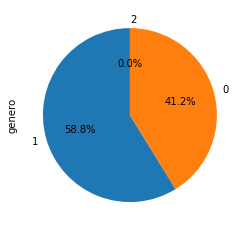

In [3]:
def genero(x):
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1
    return 2

#data['gender'].value_counts().to_frame()

data['genero'] = data['gender'].apply(genero)
data['genero'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['genero'].value_counts().to_frame()

*Ever_Married - Se já foi casado
----

* Yes -> 1
* No -> 0

,casamento
1,3245
0,1754


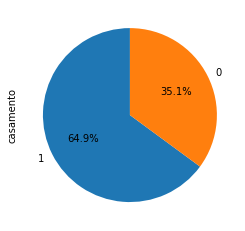

In [4]:
def casado(x):
    if x == 'Yes':
        return 1
    return 0
#data['ever_married'].value_counts().to_frame()

data['casamento'] = data['ever_married'].apply(casado)
data['casamento'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['casamento'].value_counts().to_frame()

*Work_Type - Tipo de Trabalho
---

Criado um DataFrame chamado "work" a partir do get_dummies de "data", criado uma coluna com os 'stroke' de "data" e uma nova coluna nomeada 'wt_vitimas' inicialmente totalmente NaN. 

Para completar a coluna 'wt_vitimas' é realizado uma comparação entre cada coluna de "work" que indica que tipo de trabalho a pessoa se enquanta) e a coluna de "work" que indica se essa pessoa sofreu ou não um AVC, caso sejam ambos '1' indica que a pessoa de determinado tipo de trabalho sofreu um AVC, sendo categorizado em:

* 1 - Govt_job
* 2 - Never_ worked
* 3 - Private
* 4 - Self-employed
* 5 - children

Pelo value_counts() realizado na coluna 'wt_vitimas' temos que nem 'children' nem 'Never_worked' sofreram um AVC, permitindo que ao categorizarmos o 'work_type' em "data" possamos juntar esses dois tipos de trabalho.


* private -> 1
* self-employed -> 2
* govt_jov -> 3
* children + never_worked-> 0

,trabalho
1,2862
2,778
0,715
3,644


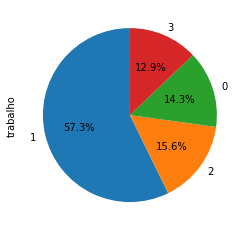

In [5]:
work = pd.get_dummies(data['work_type'])
work['stroke'] = data['stroke']
work['wt_vitimas'] = 'NaN'

for index, row in work.iterrows():
    if row['Govt_job'] == 1 and row['stroke']== 1:
        work.loc[index,'wt_vitimas'] = 1
    elif row['Never_worked'] == 1 and row['stroke']== 1:
        work.loc[index,'wt_vitimas'] = 2
    elif row['Private'] == 1 and row['stroke']== 1:
        work.loc[index,'wt_vitimas'] = 3  
    elif row['Self-employed'] == 1 and row['stroke']== 1:
        work.loc[index,'wt_vitimas'] = 4
    elif row['children'] == 1 and row['stroke']== 1:
        work.loc[index,'wt_vitimas'] = 5

def trabalho(x):
    if x == 'Private':
        return 1
    elif x == 'Self-employed':
        return 2
    elif x == 'Govt_job':
        return 3
    return 0

data['trabalho'] = data['work_type'].apply(trabalho)
data['trabalho'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['trabalho'].value_counts().to_frame()

*Residence Type - Tipo de Residencia
---

* Urban -> 1
* Rural -> 0

,residencia
1,2537
0,2462


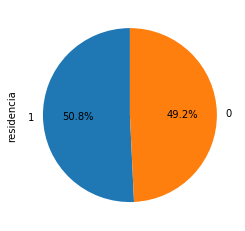

In [6]:
def residencia(x):
    if x == 'Urban':
        return 1
    return 0


data['residencia'] = data['Residence_type'].apply(residencia)
data['residencia'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['residencia'].value_counts().to_frame()

AVG Glucose Level - Taxa Média de Glicose
---

Pelas fontes, é possivel ter duas classificações. Como a primeira é muito específica e não nos traz muita informação qualitativa, inicialmente, preferi a primeira classificação.

https://www.verywellhealth.com/estimated-average-glucose-eag-3289637 - é possivel dividirmos em 9 grupos

https://my.clevelandclinic.org/health/diagnostics/16790-blood-sugar-tests - é possivel dividir em 3 grupos

* avg <110 - normal -> 0
* avg >=110 <=125 - prediabetico ->1
* avg >= 226 - diabetico ->2


,glicose
0.0,3585
2.0,927
1.0,468


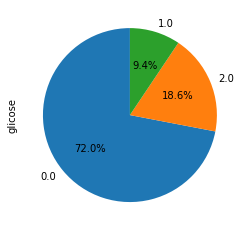

In [7]:
def glucose (x):
    if x<110.00: #normal
        return 0
    elif x>=110.00 and x<=125.00: #prediabetico
        return 1
    elif x>=126.00: #diabetico
        return 2
    
data['glicose'] = data['avg_glucose_level'].apply(glucose)
data['glicose'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['glicose'].value_counts().to_frame()

Body Mass Index (BMI) - IMC
---

Pelas fontes, é possivel ter duas classificações. Como a primeira tem mais grupos pelo falo de incluir a taxa de gravidade, inicialmente, preferi a apresentada na segunda fonte.

https://www.calculator.net/bmi-calculator.html - é possivel dividirmos em 8 grupos

https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

* Below 18.5 - Underweight ->1
* 18.5 – 24.9 - Normal or Healthy Weight ->2
* 25.0 – 29.9 - Overweight ->3
* 30.0 and Above - Obese ->4
* NaN ->0


,imc
4,1871
3,1369
2,1242
1,339
0,178


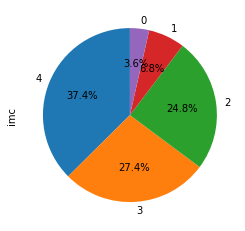

In [8]:
def imc(x):
    if x < 18.5:
        return 1
    elif x>= 18.5 and x<=24.9:
        return 2
    elif x>= 25.0 and x<=29.9:
        return 3
    elif x>=30.0:
        return 4
    return 0 

data['imc'] = data['bmi'].apply(imc)
data['imc'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['imc'].value_counts().to_frame()

Smoking_Status - Status de Fumante
---

Criado um DataFrame chamado "smoke" a partir do get_dummies de "data", criado uma coluna com os 'stroke' de "data" e uma nova coluna nomeada 'smoke_vitimas' inicialmente totalmente NaN.

Para completar a coluna 'smoke_vitimas' é realizado uma comparação entre cada coluna de "smoke" que indica que tipo de fumante a pessoa é e a coluna de "smoke" que indica se essa pessoa sofreu ou não um AVC, caso sejam ambos '1' indica que a pessoa de determinado tipo de trabalho sofreu um AVC, sendo categorizado em:

* 1 -> formerly smoked - já fumou antigamente
* 2 -> never smoked
* 3 -> smoke

Pelo value_counts() realizado na coluna 'smoke_vitimas' temos que todo tipo de fumante já sofeu um AVC, além daqueles que decidiram não informar sobre essa categoria (NaN) desta forma, não se pode juntar nenhuma dessas categorias qualitativas como foi realizado em 'work_type', além de que é necessária manter uma categoria a parte para os NaN.

* Smokes ->1
* Formerly Smoked ->2
* Never Smoked ->3
* NaN ->0

,fumante
3,1858
0,1525
2,845
1,771


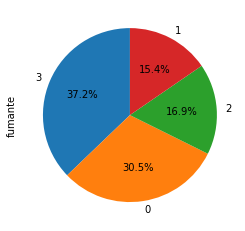

In [9]:
smoke = pd.get_dummies(data['smoking_status'], dummy_na=True)
smoke['stroke'] = data['stroke']
smoke['smoke_vitimas'] = 'NaN'

for index, row in smoke.iterrows():
    if row['formerly smoked'] == 1 and row['stroke']== 1:
        smoke.loc[index,'smoke_vitimas'] = 1
    elif row['never smoked'] == 1 and row['stroke']== 1:
        smoke.loc[index,'smoke_vitimas'] = 2
    elif row['smokes'] == 1 and row['stroke']== 1:
        smoke.loc[index,'smoke_vitimas'] = 3
    
smoke['smoke_vitimas'].value_counts().to_frame()

def fumar(x):
    if x =='smokes':
        return 1
    elif x=='formerly smoked':
        return 2
    elif x=='never smoked':
        return 3
    return 0 #NaN

data['fumante'] = data['smoking_status'].apply(fumar)
data['fumante'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
data['fumante'].value_counts().to_frame()

Drop Colunas
-----

Deletando todas as colunas qualitativas antigas.

In [13]:
#data.drop(columns=['gender','ever_married','work_type','Residence_type',
#                   'smoking_status'], axis =1, inplace=True)
data.columns = ('id','idade','hipertensao','doenca_coracao','valor_glicose','valor_imc','avc','genero','casamento',
                'trabalho','residencia','glicose','imc','fumante')
print(data)

         id  idade  hipertensao  doenca_coracao  valor_glicose  valor_imc  \
0     30669    3.0            0               0          95.12       18.0   
1     30468   58.0            1               0          87.96       39.2   
2     16523    8.0            0               0         110.89       17.6   
3     56543   70.0            0               0          69.04       35.9   
4     46136   14.0            0               0         161.28       19.1   
...     ...    ...          ...             ...            ...        ...   
4994  41163   26.0            0               0          60.82       31.5   
4995   7165   33.0            0               0          77.02       32.2   
4996  10745   52.0            0               0         110.77       39.5   
4997  26015   66.0            0               0         101.45        NaN   
4998  58499   31.0            0               0          87.42       32.4   

      avc  genero  casamento  trabalho  residencia  glicose  imc  fumante  

--------------------------------------------------------------
Trabalhando apenas com pessoas que sofreram AVC
-----------------------------------------------------------
--------------------------------------------------------------

Selecionando para trabalhar apenas as pessoas que sofreram AVC, temos 82 pacientes.

Como todos os pacientes sofreram AVC, podemos dropar a coluna AVC.

In [14]:
vitimas = data[data['avc'] == 1]
print(vitimas['avc'].count()) #quantidade de pacientes
vitimas.drop(columns=['avc'], axis=1, inplace=True)
print(vitimas)

82
         id  idade  hipertensao  doenca_coracao  valor_glicose  valor_imc  \
63     9046   67.0            0               1         228.69       36.6   
81    51676   61.0            0               0         202.21        NaN   
141   31112   80.0            0               1         105.92       32.5   
257   60182   49.0            0               0         171.23       34.4   
264    1665   79.0            1               0         174.12       24.0   
...     ...    ...          ...             ...            ...        ...   
4620  71673   79.0            0               0         110.85       24.1   
4698  45805   51.0            0               0         165.31        NaN   
4746  42117   43.0            0               0         143.43       45.9   
4962  57419   59.0            0               0          96.16       44.1   
4997  26015   66.0            0               0         101.45        NaN   

      genero  casamento  trabalho  residencia  glicose  imc  fumante  
6

/Users/brunalika/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


---------
Analisando características das vitimas
---
---------

* Hipertensão
* Doenças do Coração
* Gênero
* Casamento
    * 9 vs 73.
    * Diferença muito pequena, interessante drop na coluna.
* Trabalho
    * Não tem ninguém que nunca tenha trabalhado. Diferença quanto o tipo do trabalho que foi realizado não algo que de fato influencia, interessante drop na coluna.
* Residência
* Glicose 
    * Somente 5 pessoas são prediabeticas. 
* IMC
* Fumante

Hipertensão
---

,hipertensao
0,58
1,24


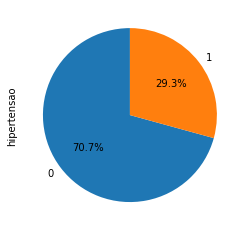

In [15]:
vitimas['hipertensao'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['hipertensao'].value_counts().to_frame()

Doença do Coração
---

,doenca_coracao
0,65
1,17


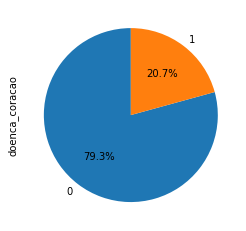

In [16]:
vitimas['doenca_coracao'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['doenca_coracao'].value_counts().to_frame()

Gênero
---

,genero
1,44
0,38


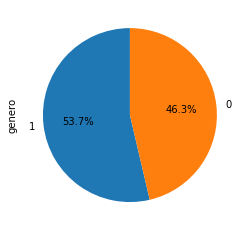

In [17]:
vitimas['genero'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['genero'].value_counts().to_frame()

*Casamento
---

,casamento
1,73
0,9


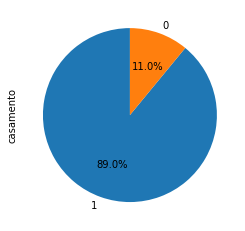

In [18]:
vitimas['casamento'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['casamento'].value_counts().to_frame()

*Trabalho
---

,trabalho
1,55
2,18
3,9


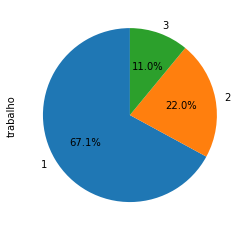

In [19]:
vitimas['trabalho'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['trabalho'].value_counts().to_frame()

*Residência
---

,residencia
1,46
0,36


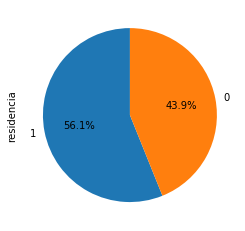

In [20]:
vitimas['residencia'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['residencia'].value_counts().to_frame()

Glicose
---

Para os poucos pré-diabéticos.

Sendo o Ponto Médio dos prédiabéticos = 117.5 e os valores de glicose que se tem das 5 pessoas classificadas como prédiabéticas, vou considerar que se a pessoa tem um valor de glicose abaixo do PM ela tem "inclinação" para normal e maior que o PM tem "inclinação" para diabético

* 120.46 ->2
* 124.13 ->2
* 113.01 ->0
* 116.55 ->0
* 110.85 ->0

,glicose
0.0,42
2.0,40


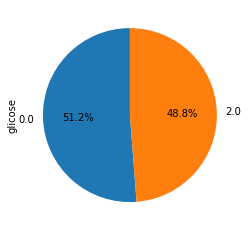

In [27]:
#print(vitimas['glicose']==1.0)
for index, row in vitimas.iterrows():
    if row['glicose'] == 1.0:
        if row['valor_glicose'] <= 117.5:
            vitimas.loc[index,'glicose'] = 0.0
        elif row['valor_glicose'] > 117.5:
            vitimas.loc[index,'glicose'] = 2.0
            
vitimas['glicose'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['glicose'].value_counts().to_frame()

IMC
---

16 - NaN

,imc
4,28
3,24
0,16
2,14


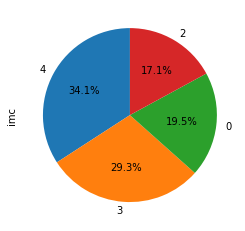

In [22]:
vitimas['imc'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['imc'].value_counts().to_frame()

Fumante
---

15 - NaN

,fumante
3,32
2,23
0,15
1,12


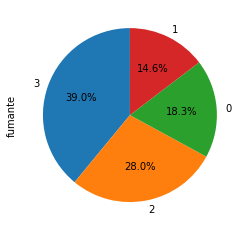

In [23]:
vitimas['fumante'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,startangle=90)
vitimas['fumante'].value_counts().to_frame()

Idade
---

A maior parte dos pacientes tem 80 anos, sendo que a média deles é de cerca de 67/68 anos.

Média da idade: 67.59756097560975
Moda da idade: 0    80.0
dtype: float64


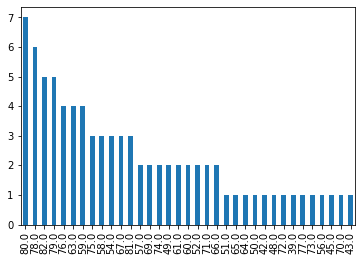

In [35]:
vitimas['idade'].value_counts().plot.bar()
print("Média da idade:",vitimas['idade'].mean())
print("Moda da idade:",vitimas['idade'].mode())

O ainda falta fazer:
--------------------

* Com relação aos dados gerais:

    * Decidir o que fazer com os 0 em smoking_class e bmi_class que representam os NaN
    
        Dúvidas: 
        Apesar de uma porcentagem significante de 0 em smoking_class(18.3% - 15 pessoas) e bmi_class(19.5% - 19 pessoas) pode-se dizer que as demais classes estão equilibradas?
        O que fazer com esses 0?

    * Colunas com * provavelmente são aquelas que poderão ser descartadas por não ter uma relevância para a doença
    
* Com relação aos dados de vitimas:

    * Fazer análise